In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime

In [2]:
import pandas as pd
train = pd.read_csv("iris/train.tsv", sep="\t", index_col=0) # 学習用データ
test = pd.read_csv("iris/test.tsv", sep="\t", index_col=0)   # 評価用データ
sample_submit = pd.read_csv("iris/sample_submit.csv", index_col=0, header=None) # 応募用サンプルファイル

In [3]:
print(train.shape)
print(train.isnull().sum())

(75, 5)
sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64


In [4]:
print(test.shape)
print(test.isnull().sum())

(75, 4)
sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
dtype: int64


In [5]:
train

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
id,,,,,
0,5.3,3.7,1.5,0.2,Iris-setosa
1,6.8,2.8,4.8,1.4,Iris-versicolor
3,6.1,3.0,4.9,1.8,Iris-virginica
4,6.4,3.2,5.3,2.3,Iris-virginica
5,6.3,3.3,4.7,1.6,Iris-versicolor
...,...,...,...,...,...
142,6.4,3.2,4.5,1.5,Iris-versicolor
143,5.4,3.9,1.7,0.4,Iris-setosa
145,5.6,3.0,4.1,1.3,Iris-versicolor


In [6]:
train = pd.get_dummies(train, columns=['class'])

In [7]:
cat_list = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cat_list

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [8]:
test

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
id,,,,
2,6.1,2.8,4.7,1.2
7,6.3,2.5,4.9,1.5
8,6.2,3.4,5.4,2.3
10,6.7,3.1,4.7,1.5
13,5.0,3.4,1.6,0.4
...,...,...,...,...
137,5.8,2.6,4.0,1.2
141,5.1,3.5,1.4,0.2
144,6.2,2.2,4.5,1.5


In [9]:
print(train.shape)
print(test.shape)

(75, 7)
(75, 4)


In [10]:
X = train.loc[:, 'sepal length in cm':'petal width in cm'].values
y = train.loc[:, 'class_Iris-setosa':'class_Iris-virginica'].values

In [11]:
print(X.shape)
print(y.shape)

(75, 4)
(75, 3)


In [12]:
X_train = X
y_train = y

In [13]:
print(X_train.shape)
print(y_train.shape)

(75, 4)
(75, 3)


In [14]:
X_test = test.loc[:,'sepal length in cm':'petal width in cm'].values

In [15]:
print(X_test.shape)

(75, 4)


In [16]:
X_train

array([[5.3, 3.7, 1.5, 0.2],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 3.2, 5.3, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.9, 4.7, 1.4],
       [7.3, 2.9, 6.3, 1.8],
       [6.4, 2.8, 5.6, 2.1],
       [7.2, 3.2, 6. , 1.8],
       [6.1, 3. , 4.6, 1.4],
       [5.9, 3. , 5.1, 1.8],
       [6.7, 3. , 5.2, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [4.8, 3. , 1.4, 0.3],
       [4.9, 3.6, 1.4, 0.1],
       [5.9, 3. , 4.2, 1.5],
       [6.6, 3. , 4.4, 1.4],
       [6.3, 2.3, 4.4, 1.3],
       [4.6, 3.2, 1.4, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [7.6, 3. , 6.6, 2.1],
       [6.7, 2.5, 5.8, 1.8],
       [6. , 3. , 4.8, 1.8],
       [5.1, 3.4, 1.5, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 2.6, 3.5, 1. ],
       [6.7, 3.1, 5.6, 2.4],
       [4.9, 3.1, 1.5, 0.2],
       [6.5, 3. , 5.5, 1.8],
       [5.1, 3.7, 1.5, 0.4],
       [4.4, 3.2, 1.3, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5.4, 3

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train

array([[0.25714286, 0.77272727, 0.08474576, 0.04166667],
       [0.68571429, 0.36363636, 0.6440678 , 0.54166667],
       [0.48571429, 0.45454545, 0.66101695, 0.70833333],
       [0.57142857, 0.54545455, 0.72881356, 0.91666667],
       [0.54285714, 0.59090909, 0.62711864, 0.625     ],
       [0.48571429, 0.36363636, 0.50847458, 0.5       ],
       [0.48571429, 0.40909091, 0.62711864, 0.54166667],
       [0.82857143, 0.40909091, 0.89830508, 0.70833333],
       [0.57142857, 0.36363636, 0.77966102, 0.83333333],
       [0.8       , 0.54545455, 0.84745763, 0.70833333],
       [0.48571429, 0.45454545, 0.61016949, 0.54166667],
       [0.42857143, 0.45454545, 0.69491525, 0.70833333],
       [0.65714286, 0.45454545, 0.71186441, 0.91666667],
       [1.        , 0.81818182, 0.91525424, 0.79166667],
       [0.11428571, 0.45454545, 0.06779661, 0.08333333],
       [0.14285714, 0.72727273, 0.06779661, 0.        ],
       [0.42857143, 0.45454545, 0.54237288, 0.58333333],
       [0.62857143, 0.45454545,

In [44]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(keras.layers.Dropout(0.2))
#model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(keras.layers.Dropout(0.1))
model.add(Dense(3, activation='softmax'))

In [45]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 3)                 51        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
history = model.fit(X_train, y_train, batch_size=20, epochs=3000, validation_split=0.1)
#history = model.fit(X_train, y_train, batch_size=20, epochs=3000)

Epoch 1/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8819e-06 - accuracy: 1.0000
Epoch 2/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8724e-06 - accuracy: 1.0000
Epoch 3/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8549e-06 - accuracy: 1.0000
Epoch 4/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8628e-06 - accuracy: 1.0000
Epoch 5/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8644e-06 - accuracy: 1.0000
Epoch 6/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8310e-06 - accuracy: 1.0000
Epoch 7/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8358e-06 - accuracy: 1.0000
Epoch 8/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8342e-06 - accuracy: 1.0000
Epoch 9/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8247e-06 - accuracy: 1.0000
Epoch 10/3000
4/4 [==============================] - 0s 2ms/step - loss: 1.8374e-0

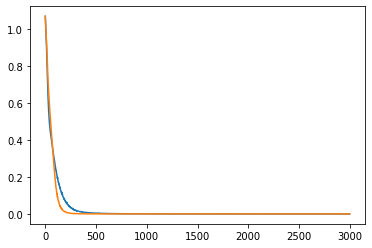

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [59]:
y_test = model.predict(X_test)

In [60]:
y_test.shape

(75, 3)

In [61]:
y_test

array([[9.98409272e-11, 1.00000000e+00, 4.16621251e-12],
       [1.79517101e-09, 1.14096724e-03, 9.98859048e-01],
       [1.63086009e-18, 3.12977522e-14, 1.00000000e+00],
       [1.28695552e-11, 1.00000000e+00, 2.25175954e-12],
       [1.00000000e+00, 2.50874682e-10, 0.00000000e+00],
       [1.00000000e+00, 5.90084537e-10, 0.00000000e+00],
       [3.04076490e-17, 2.80592996e-14, 1.00000000e+00],
       [3.27837822e-12, 1.00000000e+00, 3.47909492e-16],
       [1.00000000e+00, 3.38165096e-09, 0.00000000e+00],
       [4.73221779e-22, 2.68926159e-20, 1.00000000e+00],
       [1.32697239e-11, 1.00000000e+00, 1.23492132e-13],
       [1.00000000e+00, 5.26452215e-10, 0.00000000e+00],
       [1.00000000e+00, 2.21367282e-11, 0.00000000e+00],
       [9.96855777e-20, 8.11828537e-17, 1.00000000e+00],
       [6.66681380e-12, 1.00000000e+00, 1.58501464e-16],
       [3.84963152e-21, 4.14011987e-19, 1.00000000e+00],
       [5.54219925e-14, 8.05427669e-10, 1.00000000e+00],
       [5.55391314e-18, 8.13143

In [62]:
kekka=pd.Series(dtype=object)

In [63]:
for i in range(0,len(y_test)):
    tmp = list(y_test[i])
    kekka = kekka.append(pd.Series(cat_list[tmp.index(max(tmp))]))

In [64]:
submit = sample_submit

In [65]:
submit[1] = list(kekka)

In [66]:
submit

,1
0,
2,Iris-versicolor
7,Iris-virginica
8,Iris-virginica
10,Iris-versicolor
13,Iris-setosa
...,...
137,Iris-versicolor
141,Iris-setosa
144,Iris-versicolor


In [67]:
now = datetime.datetime.now()
submit.to_csv('iris/submit' + now.strftime('%Y%m%d_%H%M%S') + '.csv', header=None)
